In [1]:
from __future__ import division
from random import *
import re
import cv2 
import numpy as np
import os
import glob
import pytesseract
from PIL import Image
import matplotlib.image as mpimg
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
IMG_DIR = 'OCR Image/'
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
TESSDATA_PREFIX = 'C:/Program Files/Tesseract-OCR'

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [4]:
files = glob.glob ("OCR Images/*.png")
for myFile in files:
    print(myFile)
    
files = glob.glob ("OCR Images/*.jpg")
for myFile in files:
    print(myFile)
    
files = glob.glob ("OCR Images/*.jfif")
for myFile in files:
    print(myFile)

OCR Images\OCR Image 1.png
OCR Images\OCR Image 10.png
OCR Images\OCR Image 11.png
OCR Images\OCR Image 12.png
OCR Images\OCR Image 13.png
OCR Images\OCR Image 14.png
OCR Images\OCR Image 15.png
OCR Images\OCR Image 18.png
OCR Images\OCR Image 21.png
OCR Images\OCR Image 23.png
OCR Images\OCR Image 25.png
OCR Images\OCR Image 6.png
OCR Images\OCR Image 7.png
OCR Images\OCR Image 8.png
OCR Images\OCR Image 16.jpg
OCR Images\OCR Image 17.jpg
OCR Images\OCR Image 19.jpg
OCR Images\OCR Image 2.jpg
OCR Images\OCR Image 20.jpg
OCR Images\OCR Image 22.jpg
OCR Images\OCR Image 24.jpg
OCR Images\OCR Image 26.jpg
OCR Images\OCR Image 4.jpg
OCR Images\OCR Image 3.jfif
OCR Images\OCR Image 5.jfif
OCR Images\OCR Image 9.jfif


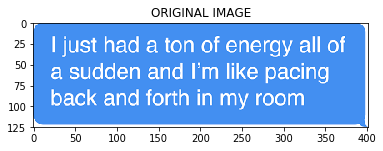

In [5]:
image = cv2.imread("OCR Images\OCR Image 1.png")
plt.imshow(image)
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [6]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

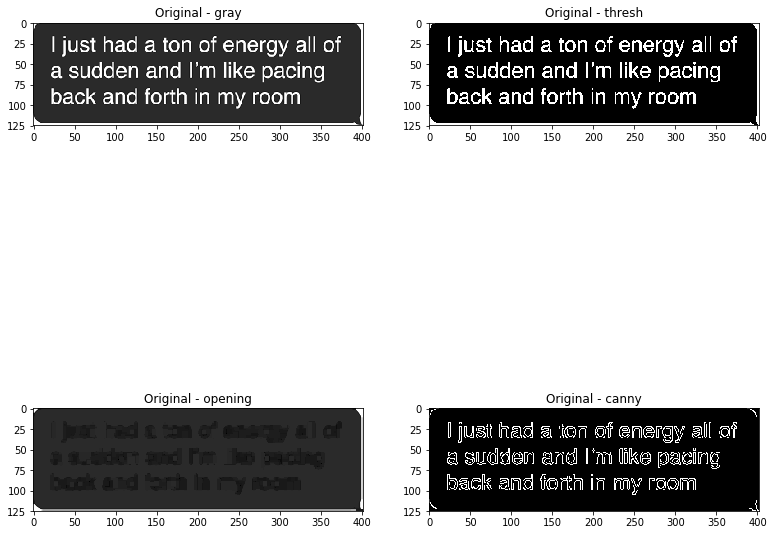

In [7]:
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('Original - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [8]:
custom_config = '--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
££
| just had a ton of energy all of
a sudden and I’m like pacing
back and forth in my room
a

-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
££
| just had a ton of energy all of
a sudden and I’m like pacing
back and forth in my room
a

-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
££
| just had a ton of energy all of
a sudden and I’m like pacing
back and forth in my room
a

-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-----------------------------------------
££
| just had a ton of energy all of
a sudden and I’m like pacing
back and forth in my room
a


In [9]:
text=pytesseract.image_to_string(image, config=custom_config)
print(text)

££
| just had a ton of energy all of
a sudden and I’m like pacing
back and forth in my room
a


In [10]:
f= open("Outputs\output 1.txt","a+") #change name as per the input.
f.write(text)
f.close()